In [3]:
from sys import stdout

import numpy as np
from numpy.polynomial.polynomial import Polynomial, polyfit
from sympy import symbols
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D as _A  # imported for "side effects"

import heisenberg

## The parameters: Generating set and n

In [4]:
S = [
    np.array((0, 0, 0)),
    np.array((1, 0, 0)),
    np.array((0, 1, 0)),
    np.array((1, 1, 0)),
    np.array((0, 0, 1)),
    np.array((1, 0, 1)),
    np.array((0, 1, 1)),
    np.array((1, 1, 1)),
]

In [7]:
n = 6

## Experiments

Computing Heisenberg sums on S = [array([0, 0, 0]), array([1, 0, 0]), array([0, 1, 0]), array([1, 1, 0]), array([0, 0, 1]), array([1, 0, 1]), array([0, 1, 1]), array([1, 1, 1])]...
showing h3


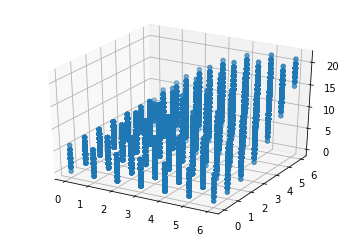

In [8]:
print("Computing Heisenberg sums on S = {}...".format(S))
p_n = list(heisenberg.compute_h3_pn(S, n))

plotted_h3 = heisenberg.PlotForm.from_pt_set(p_n)
fig = plt.figure()
print("showing h3")
plotted_h3.plotme(fig)
plt.show(fig)

### Computing the point set

In [5]:
points = set(tuple(point) for point in heisenberg.compute_h3_pn(S, n))

In [6]:
# print("P_n = {")
# for point in points:
#     print("    ({0} {1} {2})".format(point[0], point[1], point[2]))
# print("}")

If we flatten this out -- is it just a grid or is it more complicated?

Well, turns out that yes, it is a grid.

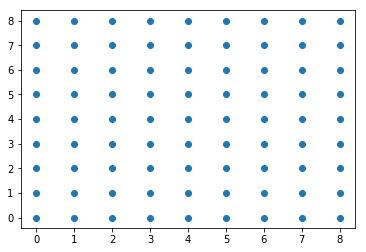

In [7]:
xy_points = set(point[0:2] for point in points)
plt.scatter([point[0] for point in xy_points], [point[1] for point in xy_points])
plt.show()

Now with the line $x + y = n$:

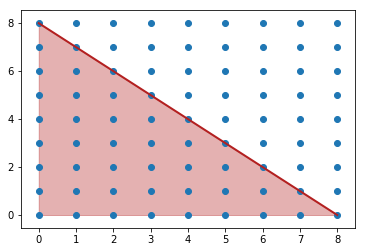

In [8]:
LINE_COLOR = (0.7, 0.125, 0.125, 1)
SHADING_COLOR = (0.7, 0.125, 0.125, 0.35)

xy_points = set(point[0:2] for point in points)
line_x = (0, n)
line_y = (n, 0)
plt.fill_between((0, n), line_y, color=SHADING_COLOR)
plt.plot(line_x, line_y, c=LINE_COLOR, lw=2)
plt.scatter([point[0] for point in xy_points], [point[1] for point in xy_points])
plt.show()

### Checking the formula for the maximum at each point
My formula for the maximum at each point is

$$
z = \begin{cases}
    T_{x+y-n-1} + 2n(x+y) - x^2 - xy - y^2 - n^2 & x + y > n \\
    xy & x + y \leq n
\end{cases}
.
$$

Alternatively, you can write this as

$$
z = \begin{cases}
    \frac{2n(x+y) + n - n^2 - x^2 - x - y^2 - y}{2} & x + y > n \\
    xy & x + y \leq n
\end{cases}
.
$$

We can rewrite the complicated part:

$$
\begin{equation*}
 \frac{2n(x+y) + n - n^2 - x^2 - x - y^2 - y}{2} \\
 = n(x+y) + \frac{1}{2}n - \frac{1}{2}n^2 - \frac{1}{2}x^2 - \frac{1}{2}x - \frac{1}{2}y^2 - \frac{1}{2}y \\
 = nx + ny + \frac{1}{2}n - \frac{1}{2}n^2 - \frac{1}{2}x^2 - \frac{1}{2}x - \frac{1}{2}y^2 - \frac{1}{2}y \\
 = (n-\frac{1}{2})x + (n-\frac{1}{2})y + \frac{1}{2}n - \frac{1}{2}n^2 - \frac{1}{2}x^2 - \frac{1}{2}y^2 \\
 = -\frac{1}{2}x^2 - \frac{1}{2}y^2 + (n-\frac{1}{2})x + (n-\frac{1}{2})y + \frac{1}{2}n - \frac{1}{2}n^2 \\
 = -\frac{1}{2}x^2 - \frac{1}{2}y^2 + (n-\frac{1}{2})x + (n-\frac{1}{2})y + \frac{1}{2}n(1 - n) \\
 = -\frac{1}{2}x^2 - \frac{1}{2}y^2 + (n-\frac{1}{2})x + (n-\frac{1}{2})y - \frac{1}{2}n(n - 1) \\
 = -\frac{1}{2}x^2 - \frac{1}{2}y^2 + (n-\frac{1}{2})x + (n-\frac{1}{2})y - T_{n-1}
\end{equation*}
$$

The second formula then becomes:

$$
z = \begin{cases}
    -\frac{1}{2}x^2 - \frac{1}{2}y^2 + (n-\frac{1}{2})x + (n-\frac{1}{2})y - T_{n-1} & x + y > n \\
    xy & x + y \leq n
\end{cases}
.
$$

Admittedly, this is uglier than what we started with. But it's in polynomial form.


In [9]:
max_zs = {}
for point in points:
    current_max_z = max_zs.get((point[0], point[1]), 0)
    if point[2] >= current_max_z:
        max_zs[point[0], point[1]] = point[2]

In [10]:
for (x, y), z in max_zs.items():
    if x + y > n:
        T = ((x+y-n-1)*(x+y-n))//2
        predicted_z = T + 2*n*(x + y) - x*x - x*y - y*y - n*n
        alt_z = (2*n*(x+y) + n - n*n - x*x - x - y*y - y)//2
        alt2_z = (-x*x - y*y + (2*n-1)*x + (2*n-1)*y - n*(n-1))//2
        if predicted_z != alt_z:
            print("DEBUG: for (x, y) = {}, got predicted_z != alt_z (predicted_z = {}, alt_z = {})."
                 .format((x, y), predicted_z, alt_z))
        if predicted_z != alt2_z:
            print("DEBUG: for (x, y) = {}, got predicted_z != alt2_z (predicted_z = {}, alt2_z = {})."
                 .format((x, y), predicted_z, alt2_z))
    else:
        predicted_z = x*y
    
    if predicted_z != z:
        print("Mismatch for (x, y) = {}".format((x, y)))

### Checking the formula for the minimum at each point
My formula for the minimum at each point is

$$
z = \begin{cases}
    T_{x+y-n-1} & x + y > n \\
    0 & x + y \leq n
\end{cases}
$$


In [11]:
min_zs = {}
for point in points:
    current_min_z = min_zs.get((point[0], point[1]), 999999999)
    if point[2] <= current_min_z:
        min_zs[point[0], point[1]] = point[2]

In [12]:
for (x, y), z in min_zs.items():
    if x + y > n:
        predicted_z = ((x+y-n-1)*(x+y-n))//2
    else:
        predicted_z = 0
    
    if predicted_z != z:
        print("Mismatch for (x, y) = {}".format((x, y)))

## Computing the formula for the max point
This is twice the formula for $x + y > n$. For $x + y \leq n$, the formula is just $xy$.

In [13]:
j, k, l = symbols("j k l")
x, y, N = symbols("x y N")

T = (x + y - N - 1)*(x + y - N)/2
expr_for_z = T + 2*N*(x+y) - x*x - x*y - y*y - N*N
simplified = 2*expr_for_z.simplify()
simplified

-N**2 + 2*N*x + 2*N*y + N - x**2 - x - y**2 - y

In [14]:
simplified == 2*N*x + 2*N*y + N - N*N - x*x - x - y*y - y

True

## Visualizing the level sets

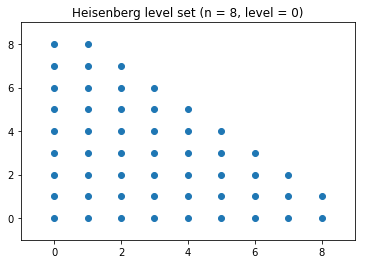

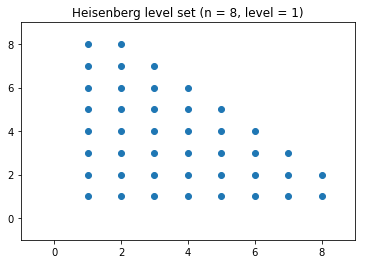

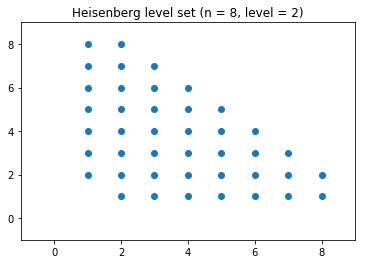

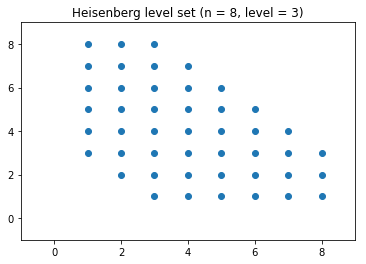

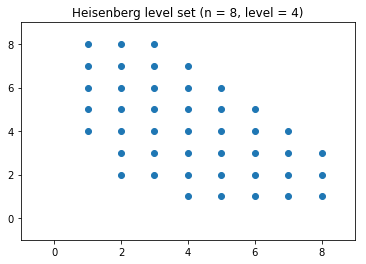

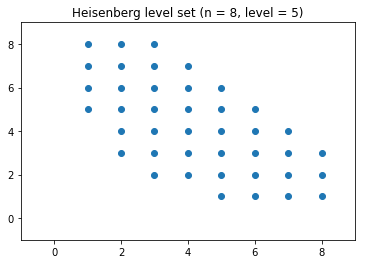

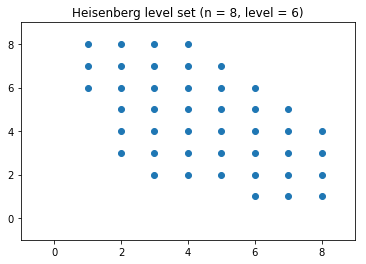

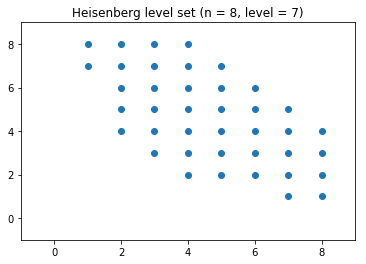

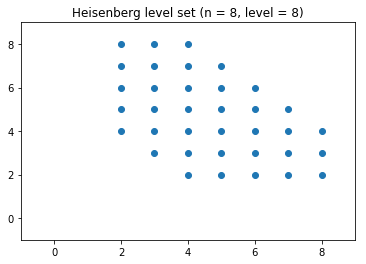

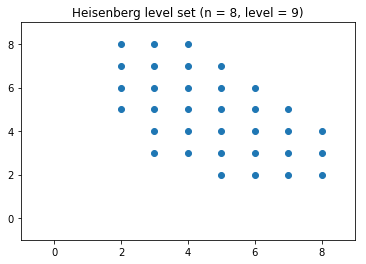

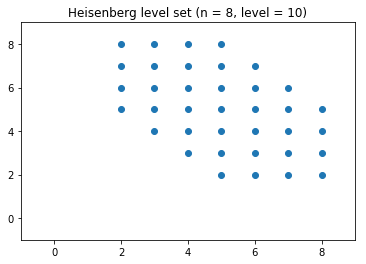

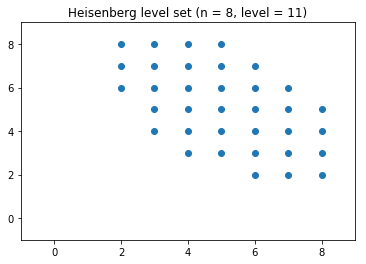

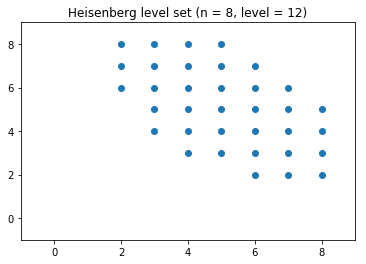

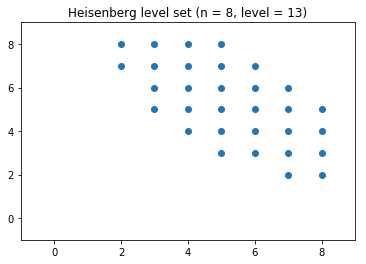

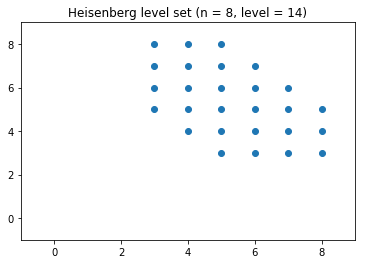

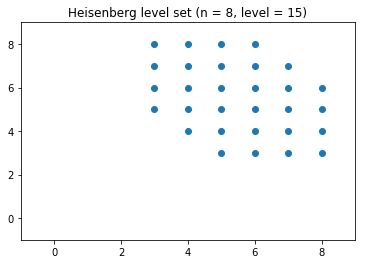

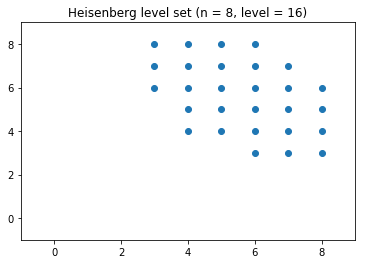

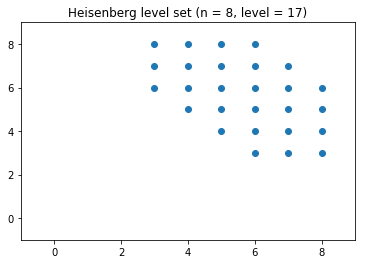

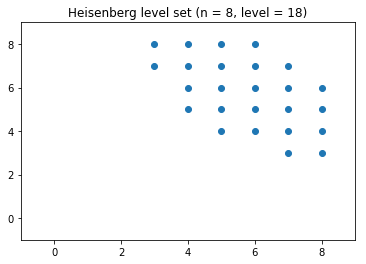

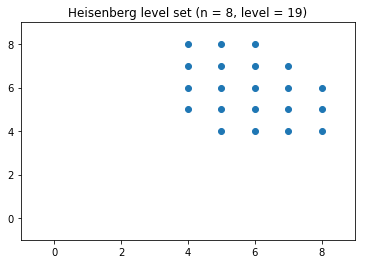

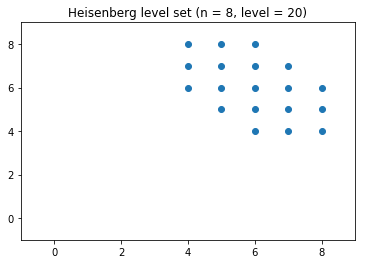

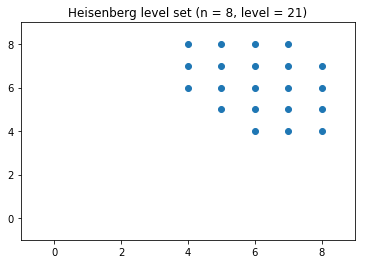

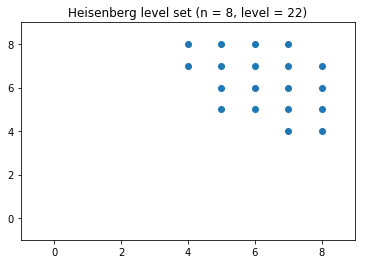

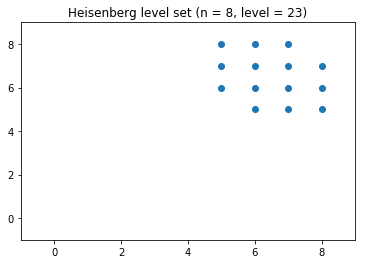

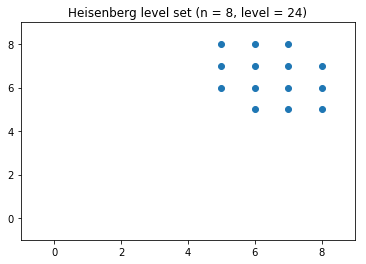

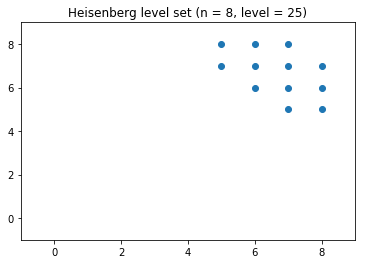

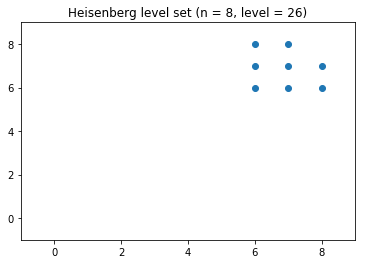

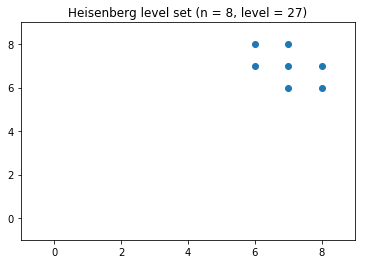

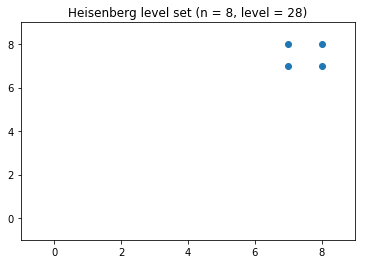

In [15]:
p_n_level_sets = {}
for point in points:
    z = point[2]
    if not z in p_n_level_sets:
        p_n_level_sets[z] = []
    
    p_n_level_sets[z].append(point)

max_z = max(key for key in p_n_level_sets.keys())

for z in range(max_z+1):
    xs = [point[0] for point in p_n_level_sets[z]]
    ys = [point[1] for point in p_n_level_sets[z]]

    plt.title("Heisenberg level set (n = {}, level = {})".format(n, z))
    axes = plt.gca()
    axes.set_xlim([-1, n+1])
    axes.set_ylim([-1, n+1])
    plt.scatter(xs, ys)
    plt.show()


Well, as you can see, the level sets are pretty fucking ugly, so let's try looking at horizontal slices. Maybe they'll be better.

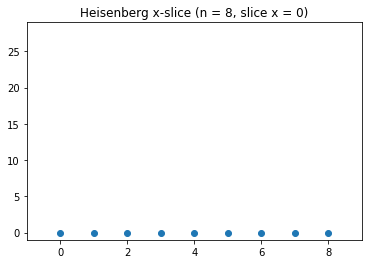

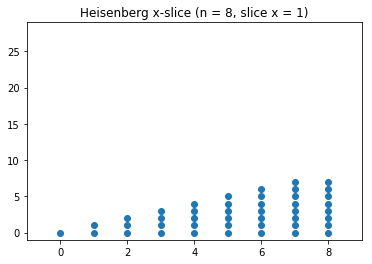

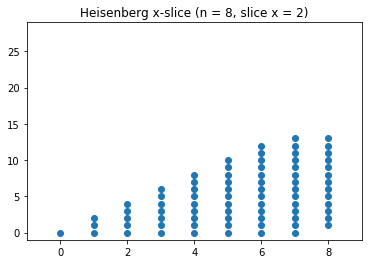

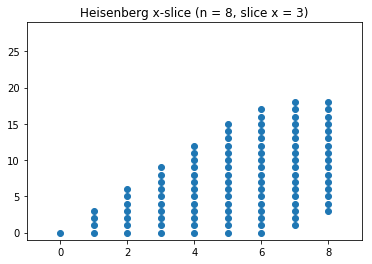

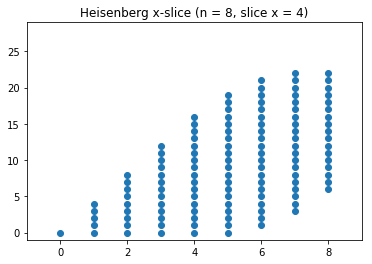

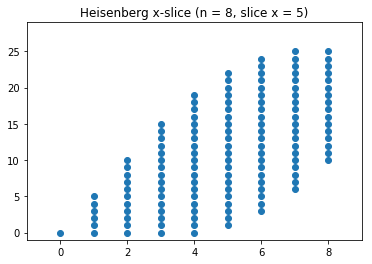

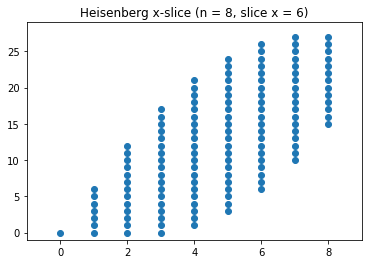

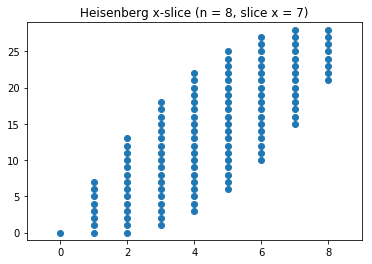

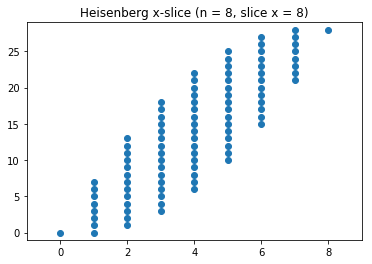

In [16]:
p_n_slices = {}
for point in points:
    x = point[0]
    if not x in p_n_slices:
        p_n_slices[x] = []
    
    p_n_slices[x].append(point)

max_x = max(key for key in p_n_slices.keys())

for x in range(max_x+1):
    ys = [point[1] for point in p_n_slices[x]]
    zs = [point[2] for point in p_n_slices[x]]

    plt.title("Heisenberg x-slice (n = {}, slice x = {})".format(n, x))
    axes = plt.gca()
    axes.set_xlim([-1, n+1])
    axes.set_ylim([-1, max_z+1])
    plt.scatter(ys, zs)
    
    plt.show()


Yes, these definitely look better, but I still can't tell what shape they are. They're not the same shape as for the tetrahedron at all. The last one looks like a leaf but it's not symmetric like it should be. Hmm. Troubling.

Let's see if we can fit some quadratic curves to these slices.

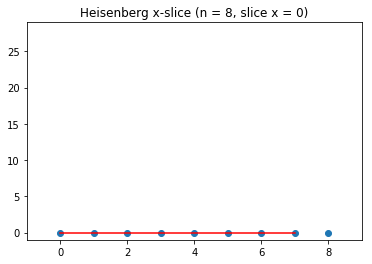

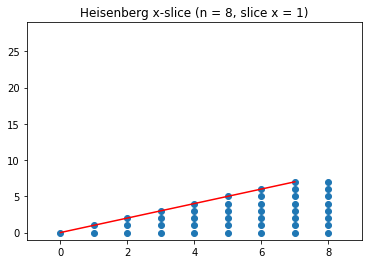

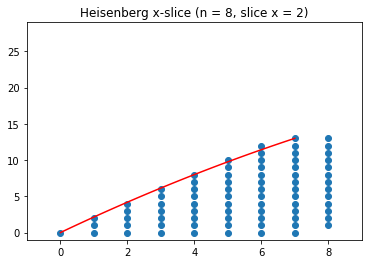

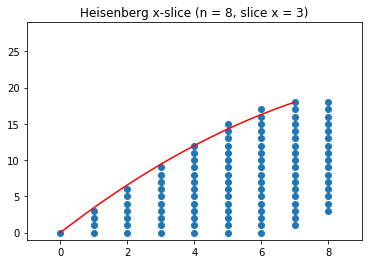

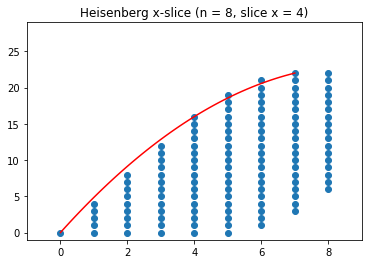

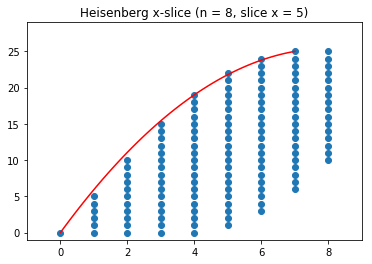

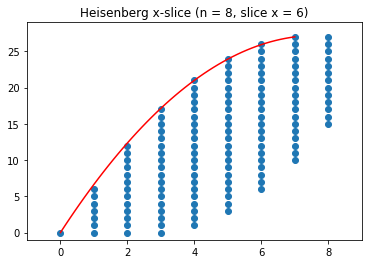

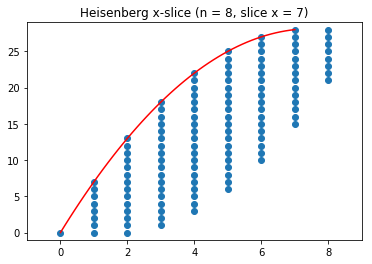

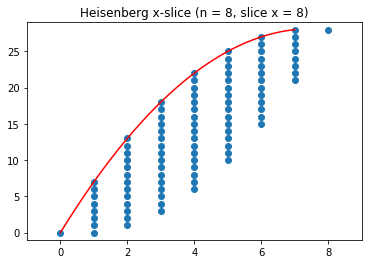

In [17]:
for x in range(max_x+1):
    ys = [point[1] for point in p_n_slices[x]]
    zs = [point[2] for point in p_n_slices[x]]

    plt.title("Heisenberg x-slice (n = {}, slice x = {})".format(n, x))
    axes = plt.gca()
    axes.set_xlim([-1, n+1])
    axes.set_ylim([-1, max_z+1])
    plt.scatter(ys, zs)
    
    ys_to_fit = [0, n//2, n-1]
    zs_to_fit = [max(point[2]
                     for point in p_n_slices[x] 
                     if point[1] == y_to_fit)
                 for y_to_fit in ys_to_fit]
    # p = np.polyfit(ys_to_fit, zs_to_fit, deg=2)
    p = Polynomial.fit(ys_to_fit, zs_to_fit, deg=2)
    y_base = np.linspace(0, n-1)
    # z_curve = p[0]*y_base*y_base + p[1]*y_base # + p[2]
    z_curve = p(y_base)
    # plt.scatter(ys_to_fit, zs_to_fit, c='r')
    plt.plot(y_base, z_curve, c='r')

    plt.show()

And, uh oh, it does **not** look like it's bounded by the fitted quadratic for some of these...

Maybe the upper bound is a parabola but the input should be the z coordinate and the output should be the y coordinate? Let's try that, I guess...

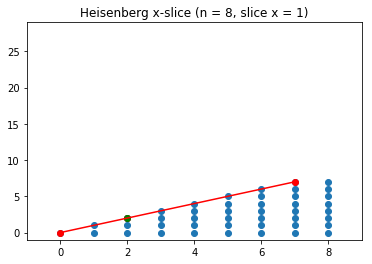

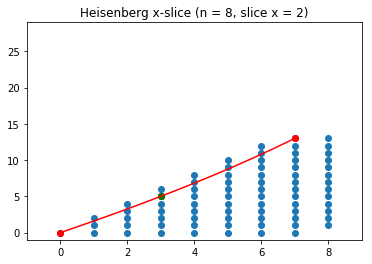

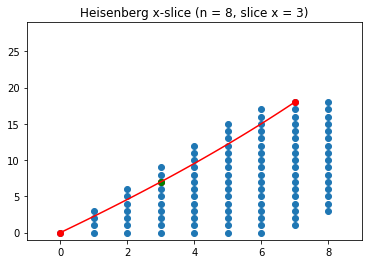

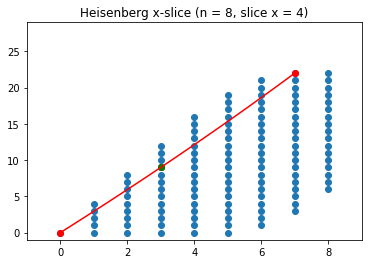

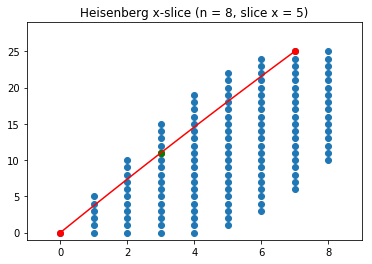

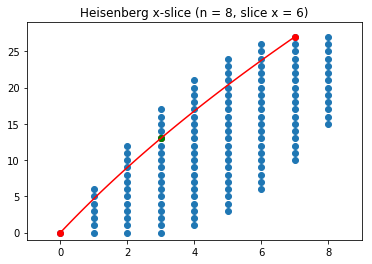

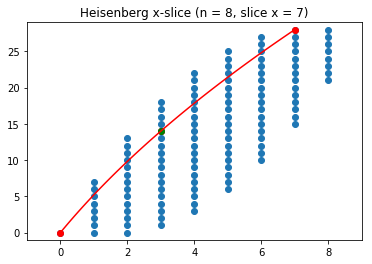

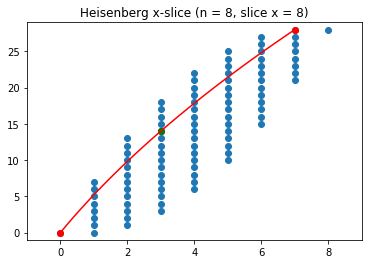

In [18]:
for x in range(1, max_x+1):
    ys = [point[1] for point in p_n_slices[x]]
    zs = [point[2] for point in p_n_slices[x]]

    plt.title("Heisenberg x-slice (n = {}, slice x = {})".format(n, x))
    axes = plt.gca()
    axes.set_xlim([-1, n+1])
    axes.set_ylim([-1, max_z+1])
    plt.scatter(ys, zs)
    
    sorted_zs = sorted(zs)
    zs_to_fit = [0, sorted_zs[len(zs)//2], sorted_zs[-1]]
    ys_to_fit = [min(point[1]
                     for point in p_n_slices[x] 
                     if point[2] == z_to_fit)
                 for z_to_fit in zs_to_fit]
    p = Polynomial.fit(zs_to_fit, ys_to_fit, deg=2)
    
    z_base = np.linspace(0, sorted_zs[-1])
    y_curve = p(z_base)
    plt.scatter(ys_to_fit, zs_to_fit, c='r')
    plt.plot(y_curve, z_base, c='r')
    plt.scatter(p(zs_to_fit[1]), zs_to_fit[1], c='g')

    plt.show()

Well, that didn't work. Oops. Looks like the upper bound isn't (purely) quadratic?

## Visualization: Hopefully just the top part

In [19]:
S_smaller = [
    np.array((1, 0, 0)),
    np.array((0, 1, 0)),
    np.array((1, 1, 0))
]

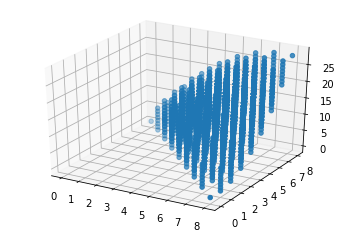

In [20]:
p_n = heisenberg.compute_h3_pn(S_smaller, n)

plotted_h3 = heisenberg.PlotForm.from_pt_set(list(p_n))
fig = plt.figure()
plotted_h3.plotme(fig)
plt.show(fig)

Alas this seems to have some depth to it. Let's try some other combos maybe?

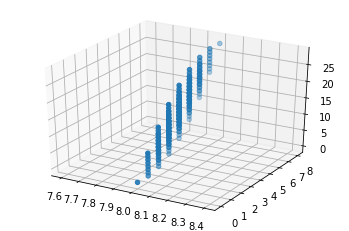

In [21]:
S_other = [
    np.array((1, 0, 0)),
    np.array((1, 1, 0))
]

p_n = heisenberg.compute_h3_pn(S_other, n)

plotted_h3 = heisenberg.PlotForm.from_pt_set(list(p_n))
fig = plt.figure()
plotted_h3.plotme(fig)
plt.show(fig)

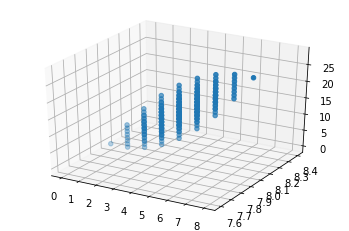

In [22]:
S_other = [
    np.array((0, 1, 0)),
    np.array((1, 1, 0))
]

p_n = heisenberg.compute_h3_pn(S_other, n)

plotted_h3 = heisenberg.PlotForm.from_pt_set(list(p_n))
fig = plt.figure()
plotted_h3.plotme(fig)
plt.show(fig)

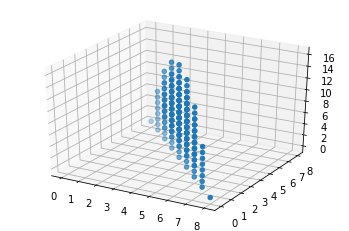

In [23]:
S_other = [
    np.array((1, 0, 0)),
    np.array((0, 1, 0))
]

p_n = heisenberg.compute_h3_pn(S_other, n)

plotted_h3 = heisenberg.PlotForm.from_pt_set(list(p_n))
fig = plt.figure()
plotted_h3.plotme(fig)
plt.show(fig)

## Computing the volume of the Heisenberg polytope
I think the volume of this should be

$$V = \frac{9}{24}n^4 = \frac{3}{8}n^4$$...

In [24]:
N, x, y = symbols('N x y')

first_integrand = x*y
second_integrand = 2*N*x + 2*N*y - x**2 - y**2 - N**2
first_integral = first_integrand.integrate((y, 0, N-x)).integrate((x, 0, N))
second_integral = second_integrand.integrate((y, N-x, N)).integrate((x, 0, N))
volume = (first_integral + second_integral).expand()
volume

3*N**4/8

# Fitting a polynomial to the number of points
We'll generate, say, 8 numbers-of-points and then pick 5 (the first 5?) to fit it to, then test on the remaining numbers. To be sure.

In [25]:
POLYNOMIAL_MAX_COMBINATION_SIZE = 10

P_k_sizes = []
for k in range(1, POLYNOMIAL_MAX_COMBINATION_SIZE + 1):
    P_k_sizes.append( (k, len(set(tuple(point) for point in heisenberg.compute_h3_pn(S, k)))) )
P_k_sizes

[(1, 4),
 (2, 12),
 (3, 32),
 (4, 75),
 (5, 156),
 (6, 294),
 (7, 512),
 (8, 837),
 (9, 1300),
 (10, 1936)]

In [26]:
# Now let's fit a polynomial to it
POLYNOMIAL_DEGREE = 4
fit_inputs = [k for (k, _) in P_k_sizes[0:POLYNOMIAL_DEGREE+1]]
fit_outputs = [size for (_, size) in P_k_sizes[0:POLYNOMIAL_DEGREE+1]]

p = Polynomial.fit(fit_inputs, fit_outputs, deg=POLYNOMIAL_DEGREE)
p.convert().coef

array([1.        , 1.83333333, 0.83333333, 0.16666667, 0.16666667])

I bet we could get better results using sympy. Or something like it. But this looks like:

$$|P_n| = 1 + \frac{11}{6}n + \frac{5}{6}n^2 + \frac{1}{6}n^3 + \frac{1}{6}n^4,$$

i.e.

$$|P_n| = \frac{1}{6}n^4 + \frac{1}{6}n^3 + \frac{5}{6}n^2 + \frac{11}{6}n + 1.$$

In [27]:
def rectified_p(k: int) -> int:
    return (k**4 + k**3 + 5 * k**2 + 11 * k + 6)//6

In [28]:
# Testing...
for i in range(POLYNOMIAL_DEGREE + 1, POLYNOMIAL_MAX_COMBINATION_SIZE):
    k, size = P_k_sizes[i]
    if rectified_p(k) != size:
        print(f"Polynomial was wrong for k = {k}! Bad! Expected {size}, got {rectified_p(k)}!")
    else:
        # include {size} in case of NaNs. unlikely because we're doing integer computations but I don't know if
        # Python does any conversions to float when computing rectified_p(k)...
        print(f"({k}, size = {rectified_p(k)} = {size})")

(6, size = 294 = 294)
(7, size = 512 = 512)
(8, size = 837 = 837)
(9, size = 1300 = 1300)
(10, size = 1936 = 1936)


## Summary: Volume and number of points
The volume of the Heisenberg polytope is given by

$$V_n = \frac{3}{8}n^4.$$

The number of points in the $n^{\text{th}}$ point cloud is given by

$$|P_n| = \frac{1}{6}n^4 + \frac{1}{6}n^3 + \frac{5}{6}n^2 + \frac{11}{6}n + 1.$$

# Finding the number of points analytically
This is something we want to do. How can we do it?

Well, I could try and find a closed form for the number of points in the base triangle and then outside the base and combine them. Like... find a closed form for...

$$\sum_{i=1}^n \sum_{j=1}^{n-i} \left(ij + 1\right) \text{(number of points in the triangle)},$$

and for

$$\sum_{i=2}^n \sum_{j=n-i+1}^{n} \left(2n\left(i+j\right) - i^2 - j^2 - n^2 + 1\right) \text{(number of points outside the triangle)}.$$

This seems doable but not something I want to try and rush to do.

Well... hm. Let's start with sum number one because it's pretty and I'm pretty sure it makes sense.

I can split up the first sum easily...

$$
\begin{align*}
&\phantom{{}={}} \sum_{i=1}^n \sum_{j=1}^{n-i} \left(ij + 1\right)
              \left(\sum_{i=1}^n \sum_{j=1}^{n-i} ij\right) + \left(\sum_{i=1}^n \sum_{j=1}^{n-i} 1\right) \\
              &= \left(\sum_{i=1}^n i \sum_{j=1}^{n-i} j\right) + \left(\sum_{i=1}^n \sum_{j=1}^{n-i} 1\right) \\
              &= \left(\sum_{i=1}^n i \frac{(n-i)(n-i+1)}{2}\right) + \left(\sum_{i=1}^n (n-i)\right) \\
              &= \left(\sum_{i=1}^n i \frac{1}{2}(i^2 - (2n + 1)i + n^2 + n) \right) + \left(n^2 \sum_{i=1}^n (-i)\right) \\
              &= \frac{1}{2}\left(\sum_{i=1}^n (i^3 - (2n + 1)i^2 + (n^2 + n)i) \right) + \left(-n^2 \sum_{i=1}^n (i)\right) \\
              &= \frac{1}{2}\left(\left(\sum_{i=1}^n i^3\right) - (2n + 1)\left(\sum_{i=1}^n i^2\right) + (n^2 + n)\left(\sum_{i=1}^n i\right) \right) + \left(-n^2 T_n\right) \\
              &= \frac{1}{2}\left(\frac{1}{4}n^2(n+1)^2 - \frac{1}{6}n(n+1)(2n + 1)^2 + \frac{1}{2}n^2(n + 1)^2 \right) - \frac{1}{2}n^3(n+1) \\
\end{align*}
$$

... Well, bleh. It's not hard to see at this point that this expression has to be quartic. I'm not expanding it all out by hand. I've shown that the number of points is quartic and I've found a quartic that fits the number of points, so... I've found the quartic.

# Notes (2019-09-25)
(Angela) we want to try generalizing about generating sets where the entries of each point in the generating set are 0 or 1. We'd like to generalize to sets $S$ such that $x_i \geq 0$ for all $x \in S$ but that's a bit of a reach so for now we just want to talk about binary ones.

(Sean) Can we prove that a greedy algorithm for finding the highest point works? We want to choose $t_1, ..., t_n \in S$ such that the $z$ component of $t_1 \dots t_m$ is maximized. We want to do it one vector at a time.

(Angela) $(1, 1, 1)^n = (n, n, T_n)$. What do we get from raising $(1, 1, a)$ to the $n^{\text{th}}$ power? (Me, I think it should come out to be $T_{n-1} + na$.) She got $T_{n-1} + na$. (Matches! Yay! Agreement!)

(Sean) What is $(1, b, c)^n$? What is $(a, b, c)^n$? (I don't want to think about it ughhh. I'm sure I computed this at some point, and I don't want to do it again.)

(Angela) $(1, b, c)^n_z = nc + b T_{n-1}$.

(Angela) $(a, 1, c)^n_z = nc + a T_{n-1}$.

(Angela) $(a, b, c)^n_z = nc + ab \:\text{Pyr}_{n-1}$. (I'm hoping for it to be $nc + (a+b)T_{n-1}$ but oh nooo it's not sounding like it will be.)

We decided to use $\Delta_n$ for the $n^\text{th}$ pyramid number cause... I suggested it, it's my fault. It looks like a pyramid and we're already using $T_n$ for triangle numbers so you shouldn't get it confused with triangles? I guess.

# Notes (2019-10-02)
Most of the formulas we found were correct. The $(a, b, c)^n$ was close but actually turns out it's triangular numbers, so it's $(a, b, c)^n_z = nc + abT_{n-1}$. So that makes the specific formulas for $(1, b, c)$ and $(a, 1, c)$ work out nicely.

Next: Can we split a shape up into little shapes and figure out stuff about the big shape from the little shape?